In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([x for x in range(100)])
X = X.reshape(-1, 1)
y = 46 + 2 * X.flatten()

In [3]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [4]:
y

array([ 46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,
        72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,
        98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122,
       124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200,
       202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226,
       228, 230, 232, 234, 236, 238, 240, 242, 244])

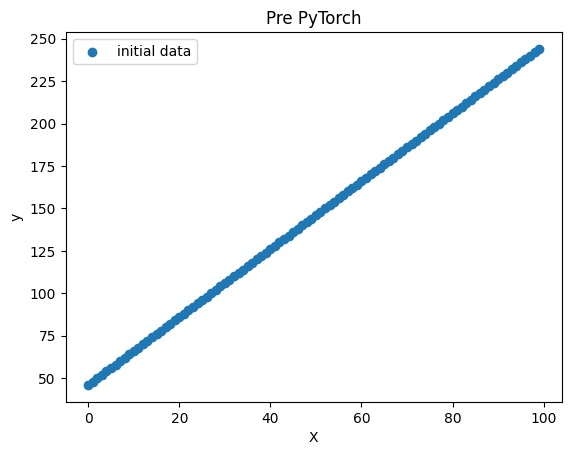

In [6]:
plt.scatter(X, y, label='initial data')
plt.title('Pre PyTorch')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
x_mean, x_std = X.mean(), X.std()
X_normalized = (X - x_mean) / x_std
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)

In [8]:
print(X_tensor.shape)

torch.Size([100, 1])


In [9]:
y_mean, y_std = y.mean(), y.std()
y_normalized = (y - y_mean) / y_std
y_tensor = torch.tensor(y_normalized, dtype=torch.float32)

In [10]:
print(y_tensor.shape)

torch.Size([100])


In [11]:
class LinearRegressionModel(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    return self.linear(x).squeeze(1)

In [12]:
in_features = 1
out_features = 1
model = LinearRegressionModel(in_features, out_features)

In [13]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [34]:
num_epochs = 50

In [35]:
for epoch in range(num_epochs):
  outputs = model(X_tensor)
  loss = criterion(outputs, y_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [37]:
new_x = 121
new_x_normalized = (new_x - x_mean) / x_std
new_x_tensor = torch.tensor(new_x_normalized, dtype=torch.float32).view(1, -1)
model.eval()
with torch.no_grad():
  prediction_normalized = model(new_x_tensor)

prediction_denormalized = prediction_normalized.item() * y_std + y_mean

print(f'Predicted Value for X = {new_x}: {prediction_denormalized}')

Predicted Value for X = 121: 287.9999920183898


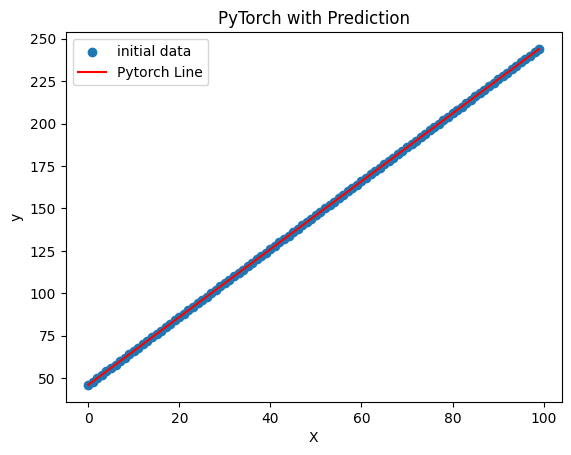

In [38]:
plt.scatter(X, y, label='initial data')
fit_line = model(X_tensor).detach().numpy() * y_std + y_mean
plt.plot(X, fit_line, 'r', label='Pytorch Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')

plt.title('PyTorch with Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()